In [ ]:

import numpy
# from keras.datasets import imdb
import tensorflow 
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

In [ ]:
!pip install keras-video-generators

  Created wheel for keras-video-generators: filename=keras_video_generators-1.0.14-py3-none-any.whl size=12881 sha256=7b27ef5dbe11e476793c09b6e25933f4025959a0c9538670226c30d2c66c19b8
  Stored in directory: /root/.cache/pip/wheels/bc/22/94/eda4e8caf00c0ffd3030fecbf2e0334b8a7f038f4451e20b00
Successfully built keras-video-generators


In [ ]:
# truncate and pad input sequences
# max_review_length = 500
# X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)

In [ ]:

# # create the model
# embedding_vecor_length = 32
# model = Sequential()
# model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
# model.add(LSTM(100))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model.summary())
# model.fit(X_train, y_train, epochs=3, batch_size=64)

In [ ]:
import numpy as np
import random
import cv2
import os
import tensorflow as tf
from tensorflow.keras.layers import Conv2D , MaxPooling2D, SimpleRNN,GRU,LSTM,Dense, Flatten,TimeDistributed
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
# class Ball_Frame:
#     def __init__(self,dataset_size):
#         # self.dataset_size = 5
#         self.num_frames = 30
#         self.frame_width = 30
#         self.frame_height = 20
#         self.step = 2

#     def make_frame(self,label, init_x, init_y):
#         frames = []
#         next_y = init_y
#         next_x = init_x

#         for i in range(self.num_frames):

#           frame = np.zeros((self.frame_height, self.frame_width))
#           cv2.circle(frame, (next_y, next_x), 2, 255, -1) 

#           next_x = random.randint(next_x - 2, next_x + 2)

#           if label==1:
#             next_y += self.step 

#           else:
#             next_y -= self.step

#           frames.append(frame)

#         return frames
    
#     def generate_data(self,initial_state_x, random_num):

#         if random_num < 0.5:
#           label = 0
#           initial_state_y = self.frame_width - 1

#         else:
#           label = 1
#           initial_state_y = 1

#         frames = self.make_frame(label, initial_state_x, initial_state_y)
        

#         return frames, label

#     def main(self,dataset_size):
      
#       for d in range(dataset_size):
#           random_num = random.random()
#           initial_state_x = random.randint(2, self.frame_height - 2)

#           data, label = self.generate_data(initial_state_x, random_num)

#           dataset.append(data)
#           labels.append(label)

In [ ]:
# TRAIN
import cv2
for i in range(11):
    vidcap = cv2.VideoCapture(f'/content/drive/MyDrive/LipReading/joon_del/0/00{i}.mp4')
    success,image = vidcap.read()
    # print(success)
    count = 0
    while success:
      cv2.imwrite(f"/content/drive/MyDrive/LipReading/X/{i}/%d.jpg" % count, image)     # save frame as JPEG file
      success,image = vidcap.read()
      # print('Read a new frame: ', success)
      count += 1

In [ ]:
# TEST
for i in range(5):
    vidcap = cv2.VideoCapture(f'/content/drive/MyDrive/LipReading/joon_del/1/01{i}.mp4')
    success,image = vidcap.read()

    count = 0
    while success:
      cv2.imwrite(f"/content/drive/MyDrive/LipReading/Y/{i}/%d.jpg" % count, image)     # save frame as JPEG file
      success,image = vidcap.read()
      # print('Read a new frame: ', success)
      count += 1

In [ ]:
dataset_path = '/content/drive/MyDrive/LipReading/'
width = height = 224
batch_size = 64
data_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip = False,
    # zoom_range = 0.1,
    validation_split = 0.15
)

In [ ]:
train_data = data_generator.flow_from_directory(
    os.path.join(dataset_path,'X'),
    target_size = (width,height),
    class_mode = 'categorical',
    batch_size = batch_size,
    shuffle = False,
    subset= 'training'
)

Found 1086 images belonging to 9 classes.


In [ ]:
test_data = data_generator.flow_from_directory(
    os.path.join(dataset_path,'Y'),
    target_size = (width,height),
    class_mode = 'categorical',
    batch_size = batch_size,
    shuffle = False,
    
)

Found 810 images belonging to 4 classes.


In [ ]:
base_model = tf.keras.applications.ResNet50V2(
    input_shape = (width,height,3),
    include_top = False,
    weights = 'imagenet',
    pooling = 'max'
)

In [ ]:
for layer in base_model.layers[:-5]:
  layer.trainable = False

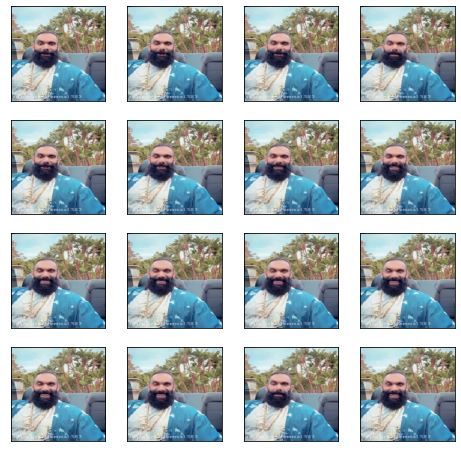

In [ ]:
train_images = next(train_data)[0]
plt.figure(figsize=(8,8))

for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)

In [ ]:
# model = tf.keras.models.Sequential([
#                                     #CNN
#                                     base_model,
#                                     #RNN
#                                     GRU(20),
#                                     Dense(3, activation='softmax')
# ])
  
                        


ValueError: ignored

In [ ]:
model = tf.keras.models.Sequential([
                                    #CNN
                                    TimeDistributed(Conv2D(2, (3,3), activation='relu',input_shape = (None,224,224,3))),
                                    TimeDistributed(MaxPooling2D(pool_size=(2,2))),
                                    TimeDistributed(Flatten()),
                                    #RNN
                                    GRU(20),
                                    Dense(9, activation='softmax')
])


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_data,epochs=15)

ValueError: ignored

In [ ]:
model.fit(X_data,Y_data,batch_size=32,epochs=2)

In [ ]:
!pip install keras-video-generators

In [ ]:
import os
import glob
import keras
from keras_video import VideoFrameGenerator
# use sub directories names as classes
classes = [i.split(os.path.sep)[1] for i in glob.glob('/content/drive/MyDrive/LipReading/joon_del/0/001.mp4')]
classes.sort()
# some global params
SIZE = (112, 112)
CHANNELS = 3
NBFRAME = 5
BS = 8
# pattern to get videos and classes
glob_pattern='videos/{classname}/*.'
# for data augmentation
data_aug = keras.preprocessing.image.ImageDataGenerator(
    zoom_range=.1,
    horizontal_flip=True,
    rotation_range=8,
    width_shift_range=.2,
    height_shift_range=.2)
# Create video frame generator
train = VideoFrameGenerator(
    classes=classes, 
    glob_pattern=glob_pattern,
    nb_frames=NBFRAME,
    split=.33, 
    shuffle=True,
    batch_size=BS,
    target_shape=SIZE,
    nb_channel=CHANNELS,
    transformation=data_aug,
    use_frame_cache=True)

ModuleNotFoundError: ignored

In [ ]:
import keras
import cv2 as cv
import glob
import numpy as np
import os
import random
import math

# author: Patrice Ferlet <patrice.ferlet@smile.fr>
# licence: MIT

class VideoFrameGenerator(keras.utils.all_utils.Sequence):
    '''
        Video frame generator generates batch of frames from a video directory. Videos should be
        classified in classes directories. E.g: 
            videos/class1/file1.avi
            videos/class1/file2.avi
            videos/class2/file3.avi
    '''
    def __init__(self,
                 from_dir,
                 batch_size=8,
                 target_shape=(224, 224, 3),
                 nbframe=5,
                 shuffle=True,
                 move_detection=8.,
                 transform:keras.preprocessing.image.ImageDataGenerator=None,
                 val_split=.2
                ):
        """
        Create a Video Frame Generator with data augmentation.
        
        Usage example:
        gen = VideoFrameGenerator('./out/videos/',
            batch_size=5,
            nbframe=3,
            transform=keras.preprocessing.image.ImageDataGenerator(rotation_range=5, horizontal_flip=True))
        
        Arguments:
        - from_dir: path to the data directory where resides videos,
            videos should be splitted in directories that are name as labels
        - batch_size: number of videos to generate
        - target_shape: image shape to generate
        - nbframe: number of frames per video to send
        - shuffle: boolean, shuffle data at start and after each epoch
        - move_detection: try to eliminate frames where no moves is detected, 
            this float value is relatvie to your dataset, if set to 0.0 => no detection
        - transform: a keras ImageGenerator configured with random transformations
            to apply on each frame. Each video will be processed with the same
            transformation at one time to not break consistence.
        - val_split: fract to setup validation data - set it to None to avoid the
            generator to split data
        """
        if val_split is not None:
            assert val_split > 0 and val_split < 1
        
        assert len(target_shape) >= 2
        
        self.from_dir = from_dir
        self.nbframe = nbframe
        self.batch_size = batch_size
        self.target_shape = target_shape
        self.shuffle = shuffle
        self.move_detection = move_detection
        self.transform = transform
        self.val_split = val_split
        
        # the list of classes, built in __list_all_files
        self.classes = []
        self.files = []
        self.data = []
        self.validation = None
        
        # prepare the list
        self.__filecount = 0
        self.__frames = {}
        if from_dir != None:
            self.__list_all_files()
        
    
    def __len__(self):
        """ Length of the generator
        Warning: it gives the number of loop to do, not the number of files or
        frames. The result is number_of_video/batch_size. You can use it as
        `step_per_epoch` or `validation_step` for `model.fit_generator` parameters.
        """
        return self.__filecount//self.batch_size
        #return len(self.data*self.batch_size)
        
    
    def __getitem__(self, index):
        """ Generator needed method - return a batch of `batch_size` video
        block with `self.nbframe` for each
        """
        indexes = self.data[index*self.batch_size:(index+1)*self.batch_size]
        X, Y = self.__data_aug(indexes)
        return X, Y
    
    
    def on_epoch_end(self):
        """ When epoch has finished, random shuffle images in memory """
        if self.shuffle:
            random.shuffle(self.data)
    
    
    def get_validation(self):
        return self.validation
    
    
    def __list_all_files(self):
        """ List and inject images in memory """
        self.classes = glob.glob(os.path.join(self.from_dir, '*'))
        self.classes = [os.path.basename(c) for c in self.classes]
        self.__filecount = len(glob.glob(os.path.join(self.from_dir, '*/*')))
        
        current_count = self.__filecount #  because __filecount can change
        
        if self.val_split is not None:
            valcount = int(self.__filecount*self.val_split)
            self.__filecount=math.ceil(self.__filecount* (1.0-self.val_split))

        i = 1
        print("Inject frames in memory, could take a while...")
        for classname in self.classes:
            files = glob.glob(os.path.join(self.from_dir, classname, '*'))
            for file in files:
                print('\rProcessing file %d/%d' % (i, current_count), end='')
                i+=1
                # self.__openframe(classname, file)
                self.data.append((classname, file)) # keep file id
                
        if self.shuffle:
            random.shuffle(self.data)
        
        if self.val_split is not None:
            # initiate validation object
            self.validation = self.__class__(
                None,
                batch_size=self.batch_size,
                nbframe=self.nbframe,
                target_shape=self.target_shape,
                transform=None
            )
            self.validation.classes = self.classes
            self.validation.__filecount = valcount

            valcount = math.ceil(len(self.data)*self.val_split)
            self.validation.data = self.data[:valcount]
            self.data = self.data[valcount:]

    
    def __openframes(self, classname, file):
        """ Append ORIGNALS frames in memory, transformations are made on the fly """
        
        frames = []
        vid = cv.VideoCapture(file)
        while True:
            grabbed, frame = vid.read(file)
            if not grabbed:
                break
            frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
            frame = cv.resize(frame, self.target_shape[:2])    
            frames.append(frame)
        
        
        if self.move_detection > 0.:
            # make a movement detection
            f= frames[0]
            f = cv.cvtColor(f, cv.COLOR_RGB2GRAY)
            f = cv.GaussianBlur(f, (3,3), 7)
            last = f
            important = []
            for i in range(1, len(frames)):
                f = frames[i]
                cp = cv.cvtColor(f, cv.COLOR_RGB2GRAY)
                cp = cv.GaussianBlur(cp, (3,3), 7)
                delta = cv.absdiff(cp, last)
                thresh = cv.threshold(delta, 25, 255, cv.THRESH_BINARY)[1]
                thresh = cv.dilate(thresh, None, iterations=2)

                if np.mean(thresh) > self.move_detection:
                    important.append(f)
                last = cp

            frames = important

        step = len(frames)//self.nbframe
        if len(frames) >= self.nbframe:
            frames = frames[::step][-self.nbframe:]
            
        # add frames in memory
        if len(frames) == self.nbframe:
            # self.data.append((classname, frames))
            self.__frames[file] = frames
            return frames
        else:
            self.__filecount-=1  # remove one file from the counter
            print('\n%s/%s has not enought frames ==> %d' % (classname, file, len(frames)))
            return None
   

    def data_aug(self, batch):
        """ Make random transformation based on ImageGenerator arguments"""
        T = None
        X, Y = [], []
        for y, file in batch:
            Y.append(self.classes.index(y)) # label
            
            # if self.__frames[file] is an integer, so we need to get frames
            images = self.__frames.get(file, False)
            if not images:
                 images = self.__openframes(y, file) # this set self.__frames[file]
            
            x = []
            if self.transform:
                # apply the same transformation for this frames
                T = self.transform.get_random_transform(self.target_shape[:2])
            for img in images:
                if T:
                    x.append(self.transform.apply_transform(img, T))
                else:
                    x.append(img)
                    
            X.append(x)

        return np.array(X), keras.utils.to_categorical(Y, num_classes=len(self.classes))

In [ ]:
data = VideoFrameGenerator('/content/drive/MyDrive/LipReading/joon_del/0/001.mp4')
print(data.data_aug(10))

Inject frames in memory, could take a while...


TypeError: ignored